In [1]:
%%bash
./perf.sh ml-adnssec.dedyn.io | tee perf.csv

SERVER,PROTO,SECURITY,TIME_1000Q_S
127.0.1.1,+tcp,+dnssec,7.619
127.0.1.1,+tcp,+nodnssec,7.883
127.0.1.1,+notcp,+dnssec,8.269
127.0.1.1,+notcp,+nodnssec,8.003
127.0.2.1,+tcp,+dnssec,15.395
127.0.2.1,+tcp,+nodnssec,10.635
127.0.2.1,+notcp,+dnssec,14.987
127.0.2.1,+notcp,+nodnssec,10.471


In [16]:
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:,.1f}'.format

In [17]:
data = pd.read_csv('perf.csv')
data['qps'] = 1000 / data['TIME_1000Q_S']
data['dnssec'] = data['SECURITY'] == '+dnssec'
data['proto'] = data.apply(lambda row: 'tcp' if row['PROTO'] == '+tcp' else 'udp', axis=1)
data['agile'] = data['SERVER'] == '127.0.2.1'
data.groupby(['dnssec', 'agile', 'proto']).mean()[['qps']]

qps
dnssec agile proto      
False  False tcp   126.9
             udp   125.0
       True  tcp    94.0
             udp    95.5
True   False tcp   131.3
             udp   120.9
       True  tcp    65.0
             udp    66.7

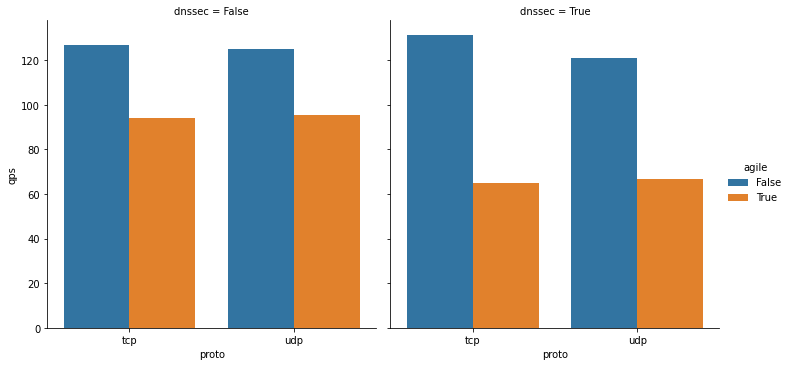

In [23]:
sns.catplot(
    data=data,
    x='proto',
    y='qps',
    hue='agile',
    col='dnssec',
    kind='bar',
)